In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_transaction = pd.read_excel("online_retail_II.xlsx")

In [5]:
df_transaction.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df_transaction.dropna(inplace=True)

In [8]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [9]:
df_recency = df_transaction.groupby(by='Customer ID',as_index = False)['InvoiceDate'].max()

In [10]:
df_recency.head()

,Customer ID,InvoiceDate
0,12346.0,2010-10-04 16:33:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00


In [11]:
df_recency.columns = ['Customer_ID','LastInvoiceDate']

In [12]:
df_recency.head()

,Customer_ID,LastInvoiceDate
0,12346.0,2010-10-04 16:33:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00


In [13]:
recent_date = df_recency['LastInvoiceDate'].max()

In [14]:
recent_date

Timestamp('2010-12-09 20:01:00')

In [15]:
df_recency['Recency'] = df_recency['LastInvoiceDate'].apply(lambda lid:(recent_date - lid).days) 

In [16]:
df_recency.head()

,Customer_ID,LastInvoiceDate,Recency
0,12346.0,2010-10-04 16:33:00,66
1,12347.0,2010-12-07 14:57:00,2
2,12348.0,2010-09-27 14:59:00,73
3,12349.0,2010-10-28 08:23:00,42
4,12351.0,2010-11-29 15:23:00,10


In [17]:
df_frequency = df_transaction.groupby(by='Customer ID' ,as_index=False)['InvoiceDate'].count()

In [18]:
df_frequency.columns = ['Customer_ID','Frequency']

In [19]:
df_frequency.head() #Customer_ID Customer_ID

,Customer_ID,Frequency
0,12346.0,46
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21


In [20]:
df_transaction['total_value'] = df_transaction.Quantity*df_transaction.Price

In [21]:
df_transaction.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [22]:
df_monetory = df_transaction.groupby(by='Customer ID',as_index=False)['total_value'].sum()

In [23]:
df_monetory.head()

,Customer ID,total_value
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93


In [24]:
df_monetory.columns = ['Customer_ID','Monetory']

In [25]:
df_monetory.head()

,Customer_ID,Monetory
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93


###### Merge three dataframes (Recency,Frequency,Monetory)

In [26]:
df_merge = df_frequency.merge(df_recency, on = "Customer_ID",how = 'inner')

In [27]:
df_merge.head()

,Customer_ID,Frequency,LastInvoiceDate,Recency
0,12346.0,46,2010-10-04 16:33:00,66
1,12347.0,71,2010-12-07 14:57:00,2
2,12348.0,20,2010-09-27 14:59:00,73
3,12349.0,107,2010-10-28 08:23:00,42
4,12351.0,21,2010-11-29 15:23:00,10


In [28]:
rfm_df = df_merge.merge(df_monetory,on ='Customer_ID')

In [29]:
rfm_df.drop(['Customer_ID'],axis=1,inplace=True)

In [30]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory
0,46,2010-10-04 16:33:00,66,-64.68
1,71,2010-12-07 14:57:00,2,1323.32
2,20,2010-09-27 14:59:00,73,222.16
3,107,2010-10-28 08:23:00,42,2646.99
4,21,2010-11-29 15:23:00,10,300.93


In [31]:
rfm_df['freq_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['rec_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['mon_rank'] = rfm_df['Monetory'].rank(ascending=True)

In [32]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory,freq_rank,rec_rank,mon_rank
0,46,2010-10-04 16:33:00,66,-64.68,2262.5,1792.0,53.0
1,71,2010-12-07 14:57:00,2,1323.32,2816.5,4126.5,3044.0
2,20,2010-09-27 14:59:00,73,222.16,1221.0,1651.5,838.0
3,107,2010-10-28 08:23:00,42,2646.99,3331.5,2421.0,3746.0
4,21,2010-11-29 15:23:00,10,300.93,1277.5,3645.0,1159.5


In [33]:
rfm_df['freq_rank_norm'] = (rfm_df['freq_rank']/rfm_df['freq_rank'].max())*100
rfm_df['rec_rank_norm'] = (rfm_df['rec_rank']/rfm_df['rec_rank'].max())*100
rfm_df['mon_rank_norm'] = (rfm_df['mon_rank']/rfm_df['mon_rank'].max())*100

In [34]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory,freq_rank,rec_rank,mon_rank,freq_rank_norm,rec_rank_norm,mon_rank_norm
0,46,2010-10-04 16:33:00,66,-64.68,2262.5,1792.0,53.0,51.619895,41.457490,1.209217
1,71,2010-12-07 14:57:00,2,1323.32,2816.5,4126.5,3044.0,64.259640,95.465587,69.450148
2,20,2010-09-27 14:59:00,73,222.16,1221.0,1651.5,838.0,27.857632,38.207056,19.119325
3,107,2010-10-28 08:23:00,42,2646.99,3331.5,2421.0,3746.0,76.009582,56.009254,85.466575
4,21,2010-11-29 15:23:00,10,300.93,1277.5,3645.0,1159.5,29.146703,84.326200,26.454483


In [35]:
rfm_df.drop(['freq_rank','rec_rank','mon_rank'],axis=1,inplace=True)

In [36]:
rfm_df['rfm_score'] = rfm_df['freq_rank_norm']*0.28 + rfm_df['rec_rank_norm']*0.15 + rfm_df['mon_rank_norm']*0.57

In [37]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory,freq_rank_norm,rec_rank_norm,mon_rank_norm,rfm_score
0,46,2010-10-04 16:33:00,66,-64.68,51.619895,41.457490,1.209217,21.361448
1,71,2010-12-07 14:57:00,2,1323.32,64.259640,95.465587,69.450148,71.899122
2,20,2010-09-27 14:59:00,73,222.16,27.857632,38.207056,19.119325,24.429210
3,107,2010-10-28 08:23:00,42,2646.99,76.009582,56.009254,85.466575,78.400019
4,21,2010-11-29 15:23:00,10,300.93,29.146703,84.326200,26.454483,35.889062


RFM Thresholds


High value customers - rfm_score>0.7

Medium value customers -rfm_score <= 0.7 and >0.25

Low value customers - rfm_score <= 0.25

In [38]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory,freq_rank_norm,rec_rank_norm,mon_rank_norm,rfm_score
0,46,2010-10-04 16:33:00,66,-64.68,51.619895,41.457490,1.209217,21.361448
1,71,2010-12-07 14:57:00,2,1323.32,64.259640,95.465587,69.450148,71.899122
2,20,2010-09-27 14:59:00,73,222.16,27.857632,38.207056,19.119325,24.429210
3,107,2010-10-28 08:23:00,42,2646.99,76.009582,56.009254,85.466575,78.400019
4,21,2010-11-29 15:23:00,10,300.93,29.146703,84.326200,26.454483,35.889062


In [39]:
rfm_df.loc[rfm_df['rfm_score']>75 , 'class'] = 'High value'

In [40]:
rfm_df.loc[(rfm_df['rfm_score']>25) & (rfm_df['rfm_score']<=75 ),'class'] = 'Medium value'

In [41]:
rfm_df.loc[rfm_df['rfm_score']<=25, 'class'] = 'Low value'

In [42]:
rfm_df.head()

,Frequency,LastInvoiceDate,Recency,Monetory,freq_rank_norm,rec_rank_norm,mon_rank_norm,rfm_score,class
0,46,2010-10-04 16:33:00,66,-64.68,51.619895,41.457490,1.209217,21.361448,Low value
1,71,2010-12-07 14:57:00,2,1323.32,64.259640,95.465587,69.450148,71.899122,Medium value
2,20,2010-09-27 14:59:00,73,222.16,27.857632,38.207056,19.119325,24.429210,Low value
3,107,2010-10-28 08:23:00,42,2646.99,76.009582,56.009254,85.466575,78.400019,High value
4,21,2010-11-29 15:23:00,10,300.93,29.146703,84.326200,26.454483,35.889062,Medium value


In [43]:
rfm_df.drop(['LastInvoiceDate'],axis=1,inplace =True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rfm_df['class'] = le.fit_transform(rfm_df['class'])

In [45]:
rfm_df.head()

,Frequency,Recency,Monetory,freq_rank_norm,rec_rank_norm,mon_rank_norm,rfm_score,class
0,46,66,-64.68,51.619895,41.457490,1.209217,21.361448,1
1,71,2,1323.32,64.259640,95.465587,69.450148,71.899122,2
2,20,73,222.16,27.857632,38.207056,19.119325,24.429210,1
3,107,42,2646.99,76.009582,56.009254,85.466575,78.400019,0
4,21,10,300.93,29.146703,84.326200,26.454483,35.889062,2


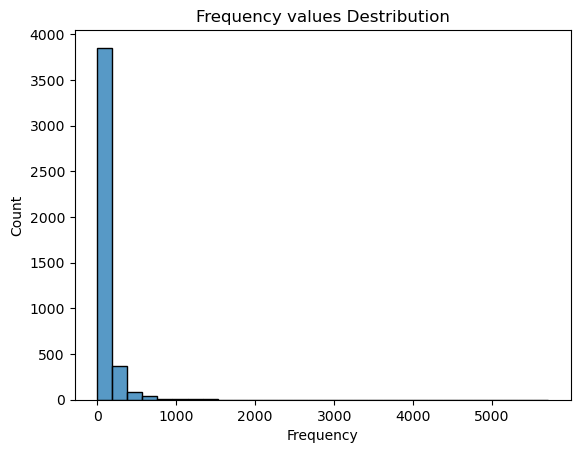

In [46]:
sns.histplot(data = rfm_df ,x = 'Frequency',bins = 30)
plt.title('Frequency values Destribution')
plt.show()

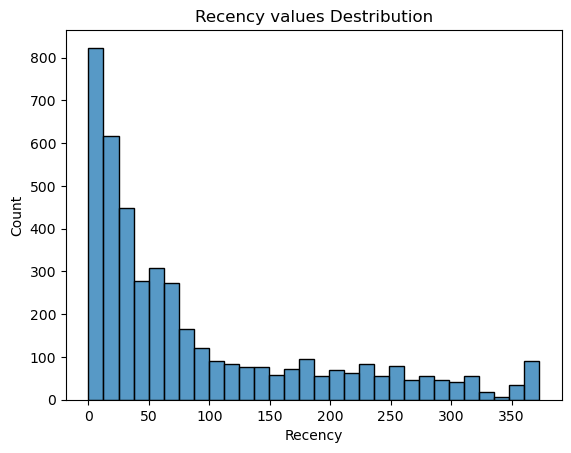

In [47]:
sns.histplot(data= rfm_df,x='Recency',bins=30)
plt.title('Recency values Destribution')
plt.show()

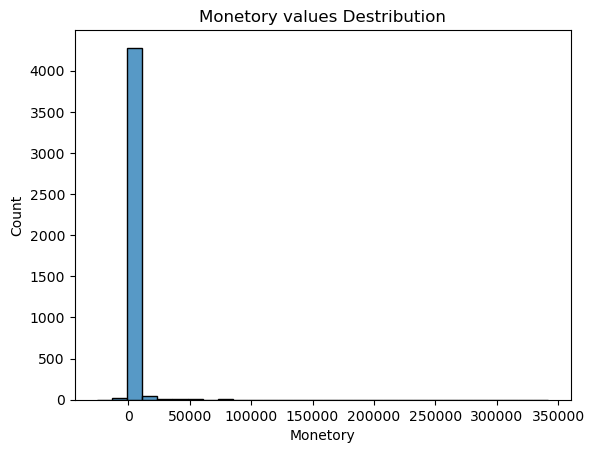

In [48]:
sns.histplot(data = rfm_df,x = 'Monetory',bins=30)
plt.title('Monetory values Destribution')
plt.show()

In [49]:
x = rfm_df.drop(['class'],axis=1).values
y = rfm_df.iloc[:,-1].values


In [50]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)


In [51]:
## split data into train and test
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.25,random_state=42)

In [52]:
#### Using Elbow method for clustering

In [53]:
destortion = []
cluster_range = range(1,30)

for i in cluster_range:
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(x)
    destortion.append(kmean.inertia_)

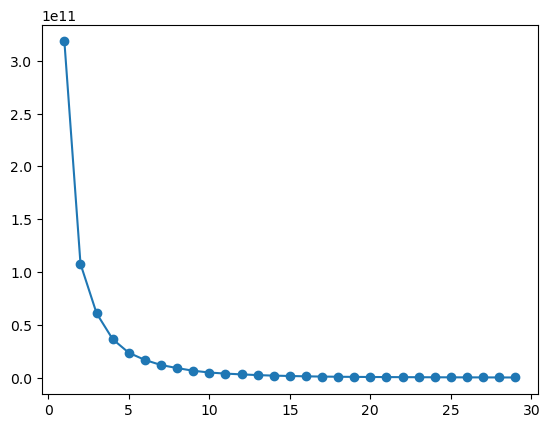

In [54]:
plt.plot(cluster_range,destortion,marker= 'o')
plt.show()

In [55]:
pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


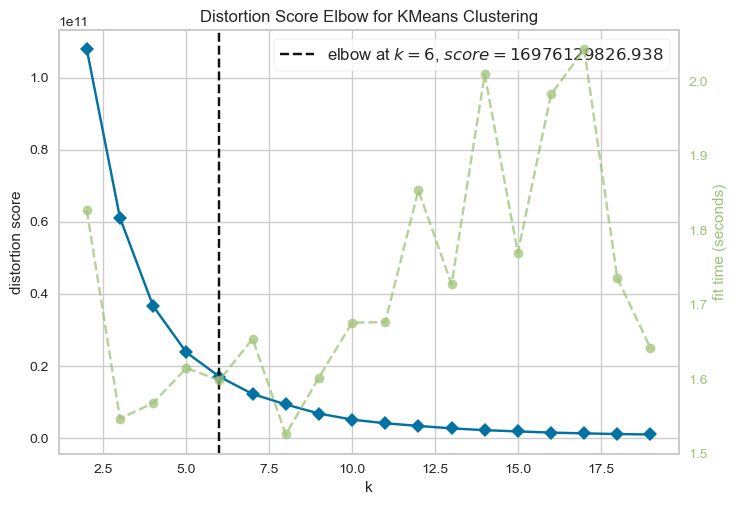

In [56]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmean, k = (2,20))
visu.fit(rfm_df)
visu.poof();


In [57]:
k_value =6
kmeans =KMeans(n_clusters=6,random_state=42)
k_pred = kmeans.fit_predict(x)

((3888,), (3888,))
((2,), (2,))
((53,), (53,))
((3,), (3,))
((15,), (15,))
((422,), (422,))


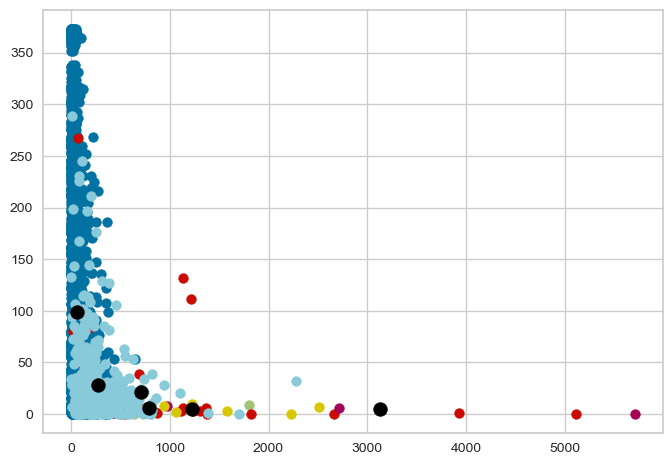

In [58]:
for i in range(k_value):
    print((x[k_pred==i,0].shape , x[k_pred==i,1].shape))
    plt.scatter(x[k_pred==i,0] , x[k_pred==i,1],s=50)

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1],s=100,c='black')

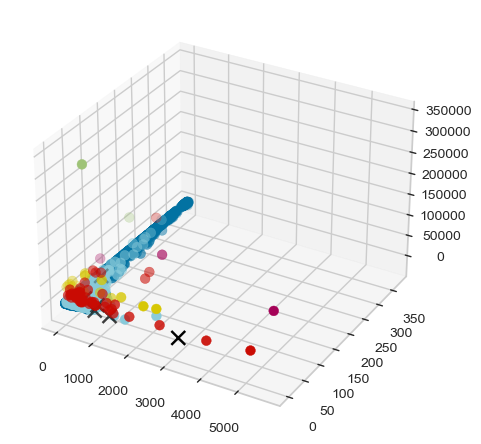

In [59]:
import plotly.express as px
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k_value):
    # Plot data
    ax.scatter3D(x[k_pred == i, 0], x[k_pred == i, 1], x[k_pred == i, 2], s=50, label=f'Cluster {i}')

# Plot the centroids
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids', marker='x')
